# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended content.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit the urls below and take a look at their source code through Chrome DevTools. You'll need to identify the html tags, special class names, etc used in the html content you are expected to extract.

**Resources**:
- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide)
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are already imported for you. If you prefer to use additional libraries feel free to do it.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import bs4

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [3]:
#This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [ ]:
# your code here

In [4]:
response = requests.get(url)

In [5]:
type(response)

requests.models.Response

In [6]:
response.status_code

200

In [ ]:
#response.content

In [7]:
html = response.content

In [13]:
len(html)

466930

In [8]:
html[:1000]

b'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  >\n\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-38f1bf52eeeb.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-56010aa53a8f.css" /><link data-color-theme="dark_dimmed" crosso

In [9]:
parsed_html = bs4.BeautifulSoup(html, "html.parser")

In [10]:
parsed_html.head

<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-38f1bf52eeeb.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-56010aa53a8f.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/assets/dark_dimmed-b2e1b478d5b4.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_high_contrast" data-href="https://github.githubassets.c

In [11]:
parsed_html.body

<body class="logged-out env-production page-responsive" style="word-wrap: break-word;">
<div class="logged-out env-production page-responsive" data-turbo-body="" style="word-wrap: break-word;">
<div class="position-relative js-header-wrapper">
<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>
<span class="progress-pjax-loader Progress position-fixed width-full" data-view-component="true">
<span class="Progress-item progress-pjax-loader-bar left-0 top-0 color-bg-accent-emphasis" data-view-component="true" style="width: 0%;"></span>
</span>
<script crossorigin="anonymous" defer="defer" src="https://github.githubassets.com/assets/react-lib-1fbfc5be2c18.js" type="application/javascript"></script>
<script crossorigin="anonymous" defer="defer" src="https://github.githubassets.com/assets/vendors-node_modules_primer_octicons-react_dist_index_esm_js-node_modules_primer_react_lib-es-2e8e7c-8c382c96424c

In [12]:
parsed_html.title

<title>Trending  developers on GitHub today · GitHub</title>

In [13]:
parsed_html.body.a

<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>

In [14]:
#find 1 "h1" tag:
article = parsed_html.find("h1")

In [15]:
article

<h1 class="sr-only" id="search-suggestions-dialog-header">Search code, repositories, users, issues, pull requests...</h1>

In [16]:
len(article)

1

In [17]:
#find all "h1" tag:
article = parsed_html.find_all("h1", {"class": "h3 lh-condensed"})

In [18]:
article[0]

<h1 class="h3 lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":216188,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="0bb1b1d36a85bbdf9097acf2e6556da4ffa472ff05ba68c2d2bda598f8fb3f03" data-view-component="true" href="/jdx">
            jdx
</a> </h1>

In [19]:
article[0].contents

['\n',
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":216188,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="0bb1b1d36a85bbdf9097acf2e6556da4ffa472ff05ba68c2d2bda598f8fb3f03" data-view-component="true" href="/jdx">
             jdx
 </a>,
 ' ']

In [23]:
article[0].contents[1].name

'a'

In [24]:
article[0].contents[1].string

'\n            jdx\n'

In [25]:
articles = []
for a in article:
    a = str(a)
    soup_a = bs4.BeautifulSoup(a, "html.parser")
    list_a = soup_a.find_all("a")
    for e in list_a:
        articles.append(e.string.strip())
print(len(articles))

25


In [26]:
articles

['jdx',
 'J. Nick Koston',
 'João Moura',
 'Gunnar Morling',
 'oobabooga',
 'Stephen Celis',
 'Charles Packer',
 'Clement Tsang',
 'Henrik Rydgård',
 'Paweł Bylica',
 'William Candillon',
 'Arvin Xu',
 'Charlie Marsh',
 'Bas Nijholt',
 'pajlada',
 'Julian Poyourow',
 'Awni Hannun',
 'Robert Knight',
 'Steven G. Johnson',
 'Dotan Simha',
 'Bruce MacDonald',
 'Alex Gaynor',
 'Andrew Kane',
 'Brais Gabín',
 'Stan Girard']

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [ ]:
# your code here

In [40]:
username = parsed_html.find("img", {"alt": "@sobolevn"})

In [41]:
users =parsed_html.find_all("img", {"alt": lambda x: x and x.startswith("@")})

In [42]:
imgs = parsed_html.find_all("img", {"alt": lambda x: x and x.startswith("@")})
for img in imgs:
    username = img["alt"]
    print(username)

@jdx
@bdraco
@joaomdmoura
@gunnarmorling
@oobabooga
@stephencelis
@cpacker
@ClementTsang
@hrydgard
@chfast
@wcandillon
@arvinxx
@charliermarsh
@basnijholt
@pajlada
@julianpoy
@awni
@robertknight
@stevengj
@dotansimha
@BruceMacD
@alex
@ankane
@BraisGabin
@StanGirard


#### Display the trending Python repositories in GitHub.

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [34]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

In [ ]:
# your code here

In [38]:
response = requests.get(url)

In [39]:
type(response)

requests.models.Response

In [28]:
response.status_code

200

In [47]:
html = response.content

In [48]:
parsed_html = bs4.BeautifulSoup(html, "html.parser")

In [49]:
parsed_html.head

<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-38f1bf52eeeb.css" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-56010aa53a8f.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/assets/dark_dimmed-b2e1b478d5b4.css" media="all" rel="stylesheet"><link crossorigin="anonymous" data-color-theme="dark_high_contrast" data-href="https://github.githubassets.c

In [50]:
parsed_html.body

<body class="logged-out env-production page-responsive" style="word-wrap: break-word;">
<div class="logged-out env-production page-responsive" data-turbo-body="" style="word-wrap: break-word;">
<div class="position-relative js-header-wrapper">
<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>
<span class="progress-pjax-loader Progress position-fixed width-full" data-view-component="true">
<span class="Progress-item progress-pjax-loader-bar left-0 top-0 color-bg-accent-emphasis" data-view-component="true" style="width: 0%;"></span>
</span>
<script crossorigin="anonymous" defer="defer" src="https://github.githubassets.com/assets/react-lib-1fbfc5be2c18.js" type="application/javascript"></script>
<script crossorigin="anonymous" defer="defer" src="https://github.githubassets.com/assets/vendors-node_modules_primer_octicons-react_dist_index_esm_js-node_modules_primer_react_lib-es-2e8e7c-8c382c96424c

In [42]:
parsed_html.title

<title>Trending  developers on GitHub today · GitHub</title>

In [51]:
article = parsed_html.find_all("h2", {"class": "h3 lh-condensed"})
article

[<h2 class="h3 lh-condensed">
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_REPOSITORIES_PAGE","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":731371530,"originating_url":"https://github.com/trending/python?since=daily","user_id":null}}' data-hydro-click-hmac="1c523eb46038f275fb9cfeb8399b72144380bf29f3e7b3dcf79946ccae8d3eba" data-view-component="true" href="/openai/weak-to-strong">
 <svg aria-hidden="true" class="octicon octicon-repo mr-1 color-fg-muted" data-view-component="true" height="16" version="1.1" viewbox="0 0 16 16" width="16">
 <path d="M2 2.5A2.5 2.5 0 0 1 4.5 0h8.75a.75.75 0 0 1 .75.75v12.5a.75.75 0 0 1-.75.75h-2.5a.75.75 0 0 1 0-1.5h1.75v-2h-8a1 1 0 0 0-.714 1.7.75.75 0 1 1-1.072 1.05A2.495 2.495 0 0 1 2 11.5Zm10.5-1h-8a1 1 0 0 0-1 1v6.708A2.486 2.486 0 0 1 4.5 9h8ZM5 12.25a.25.25 0 0 1 .25-.25h3.5a.25.25 0 0 1 .25.25v3.25a.25.25 0 0 1-.4.2l-1.45-1.087a.

In [52]:
article[0].contents

['\n',
 <a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_REPOSITORIES_PAGE","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":731371530,"originating_url":"https://github.com/trending/python?since=daily","user_id":null}}' data-hydro-click-hmac="1c523eb46038f275fb9cfeb8399b72144380bf29f3e7b3dcf79946ccae8d3eba" data-view-component="true" href="/openai/weak-to-strong">
 <svg aria-hidden="true" class="octicon octicon-repo mr-1 color-fg-muted" data-view-component="true" height="16" version="1.1" viewbox="0 0 16 16" width="16">
 <path d="M2 2.5A2.5 2.5 0 0 1 4.5 0h8.75a.75.75 0 0 1 .75.75v12.5a.75.75 0 0 1-.75.75h-2.5a.75.75 0 0 1 0-1.5h1.75v-2h-8a1 1 0 0 0-.714 1.7.75.75 0 1 1-1.072 1.05A2.495 2.495 0 0 1 2 11.5Zm10.5-1h-8a1 1 0 0 0-1 1v6.708A2.486 2.486 0 0 1 4.5 9h8ZM5 12.25a.25.25 0 0 1 .25-.25h3.5a.25.25 0 0 1 .25.25v3.25a.25.25 0 0 1-.4.2l-1.45-1.087a.249.249 0 0 0-.3 0L5.4 

In [53]:
repos = []   
for a in article:  
    a = str(a)
    soup_a = bs4.BeautifulSoup(a, "html.parser")
    list_a = soup_a.find_all("a")    
    for e in list_a:
        repo_title = e.get_text(strip=True) 
        repos.append(repo_title)        
        
print(len(repos))

25


In [54]:
repos

['openai /weak-to-strong',
 'threestudio-project /threestudio',
 'damo-vilab /i2vgen-xl',
 'zulip /zulip',
 'microsoft /promptbase',
 'microsoft /promptbench',
 'xtekky /gpt4free',
 'coqui-ai /TTS',
 'guoyww /AnimateDiff',
 'ccxt /ccxt',
 'OpenBB-finance /OpenBBTerminal',
 'google /generative-ai-python',
 'microsoft /Mastering-GitHub-Copilot-for-Paired-Programming',
 'roboflow /supervision',
 'karpathy /nanoGPT',
 'yt-dlp /yt-dlp',
 'chatanywhere /GPT_API_free',
 'Fadi002 /de4py',
 'resemble-ai /resemble-enhance',
 'commaai /openpilot',
 'soimort /you-get',
 'Rapptz /discord.py',
 'yihong0618 /tg_bot_collections',
 'ranaroussi /yfinance',
 'Stability-AI /stablediffusion']

#### Display all the image links from Walt Disney wikipedia page.

In [55]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [ ]:
# your code here

In [56]:
response = requests.get(url)

In [57]:
html = response.content                                      

In [58]:
parsed_html = bs4.BeautifulSoup(html, "html.parser")

In [59]:
# Encontrar "img"
image = parsed_html.find(src=True)          
image

<script async="" src="/w/load.php?lang=en&amp;modules=startup&amp;only=scripts&amp;raw=1&amp;skin=vector-2022"></script>

In [ ]:
# Como al filtrar por las imagenes src también se incluyen logos png

In [60]:
# Todas las etiquetas con src

src_all = parsed_html.find_all(src=True)

In [61]:
# Localicemos dentro de todas las etiquetas aquellas con jpg y lo metemos en una lista

jpg = []
for element in src_all:
    if element['src'].endswith(".jpg"):
        jpg.append(element)

In [62]:
jpg

[<img alt="Pale yellow wooden house with brown trim surrounded by white picket fence" class="mw-file-element" data-file-height="1080" data-file-width="1440" decoding="async" height="165" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/330px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/440px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg 2x" width="220"/>,
 <img class="mw-file-element" data-file-height="1086" data-file-width="1576" decoding="async" height="152" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.

In [63]:
# Extraemos solo la etiqueta src de cada elemento de la lista

links_jpg = []   
for link in jpg:   
    src = link.get('src')  
    if src.endswith('.jpg'): 
        links_jpg.append(src)
     
        
print(len(links_jpg))

11


In [64]:
links_jpg

['//upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg/220px-Walt_Disney_Birthplace_Exterior_Hermosa_Chicago_Illinois.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg',
 '//upload.wikimedia.org/wikipedia/en/thumb/4/4e/Steamboat-willie.jpg/220px-Steamboat-willie.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Walt_Disney_Snow_white_1937_trailer_screenshot_%2813%29.jpg/220px-Walt_Disney_Snow_white_1937_trailer_screenshot_%2813%29.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/1/15/Disney_drawing_goofy.jpg/170px-Disney_drawing_goofy.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/WaltDisneyplansDisneylandDec1954.jpg/220px-WaltDisneyplansDisneylandDec1954.jpg',
 '//upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Walt_disney_portrait_right.jpg/170px-Walt_disney_portrait_right.jpg',
 '//upload.wikimedia.org/wikipedi

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page.

In [65]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 

In [ ]:
# your code here

In [66]:
response = requests.get(url)

In [67]:
html = response.content                                     

In [68]:
parsed_html = bs4.BeautifulSoup(html, "html.parser")

In [69]:
# Encontrar "li"

li = parsed_html.find_all('li')     
li

[<li class="mw-list-item" id="n-mainpage-description"><a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a></li>,
 <li class="mw-list-item" id="n-contents"><a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a></li>,
 <li class="mw-list-item" id="n-currentevents"><a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a></li>,
 <li class="mw-list-item" id="n-randompage"><a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a></li>,
 <li class="mw-list-item" id="n-aboutsite"><a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a></li>,
 <li class="mw-list-item" id="n-contactpage"><a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a></li>,
 <li class="mw-list-item" id

In [70]:
bullet = []   
for element in li:   
    if ('Python' in str(element.a)) and ('https' in str(element.a)): 
        link = str(element.a['href']) 
        bullet.append(link)
               
        
print(len(bullet))

28


In [71]:
bullet

['https://af.wikipedia.org/wiki/Python',
 'https://als.wikipedia.org/wiki/Python',
 'https://az.wikipedia.org/wiki/Python_(d%C9%99qiql%C9%99%C5%9Fdirm%C9%99)',
 'https://be.wikipedia.org/wiki/Python',
 'https://cs.wikipedia.org/wiki/Python_(rozcestn%C3%ADk)',
 'https://da.wikipedia.org/wiki/Python',
 'https://de.wikipedia.org/wiki/Python',
 'https://eu.wikipedia.org/wiki/Python_(argipena)',
 'https://fr.wikipedia.org/wiki/Python',
 'https://hr.wikipedia.org/wiki/Python_(razdvojba)',
 'https://id.wikipedia.org/wiki/Python',
 'https://ia.wikipedia.org/wiki/Python_(disambiguation)',
 'https://is.wikipedia.org/wiki/Python_(a%C3%B0greining)',
 'https://it.wikipedia.org/wiki/Python_(disambigua)',
 'https://la.wikipedia.org/wiki/Python_(discretiva)',
 'https://lb.wikipedia.org/wiki/Python',
 'https://hu.wikipedia.org/wiki/Python_(egy%C3%A9rtelm%C5%B1s%C3%ADt%C5%91_lap)',
 'https://nl.wikipedia.org/wiki/Python',
 'https://pt.wikipedia.org/wiki/Python_(desambigua%C3%A7%C3%A3o)',
 'https://ru.wi

#### Find the number of titles that have changed in the United States Code since its last release point.

In [87]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [ ]:
# your code here

In [92]:
response = requests.get(url)

In [96]:
html = response.content

In [97]:
parsed_html = bs4.BeautifulSoup(html, "html.parser")  

In [100]:
# Encontrar div class="usctitle"

divs = parsed_html.find_all('div', class_='usctitlechanged')      
divs

# No se por qué no me sale, igual es por la url que ahora ya no va

[]

In [101]:
title = []  
for div in divs:   
    div = str(div)
    soup_div = bs4.BeautifulSoup(div, "html.parser")
    list_div = soup_div.find_all("div")   
    for e in list_div:
        law_title = e.get_text(strip=True) 
        title.append(law_title)        
        
print(len(title))

0


In [86]:
title

[]

#### Find a Python list with the top ten FBI's Most Wanted names.

In [103]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten'

In [ ]:
# your code here

In [105]:
response = requests.get(url)

In [106]:
html = response.content                                     
parsed_html = bs4.BeautifulSoup(html, "html.parser")

In [107]:
primer_h3 = parsed_html.find('h3')
print(primer_h3)  

None


In [108]:
div_results = parsed_html.find('div', class_="query-results")
print(div_results)  

None


In [ ]:
# Tampoco me sale nada

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<!-- saved from url=(0023)http://kidmondo.com/404 -->
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="noindex,nofollow" name="robots"/>
<title>There was an Error </title>
<style>body{background:#fff;margin:0;padding:20px;text-align:center;font-family:Arial,Helvetica,sans-serif;font-size:14px;color:#666}.error_page{width:600px;padding:50px;margin:auto}.error_page h1{margin:20px 0 0}.error_page p{margin:10px 0;padding:0}a{color:#9caa6d;text-decoration:none}a:hover{color:#9caa6d;text-decoration:underline}</style>
</head>
<body>
<div class="error_page">

<h1>We're sorry...</h1>
<p>The page you are looking for had an error. </p>
<div class="cf-error-details cf-error-1020">
<h1>Access denied</h1>
<p>You do not have access to www.
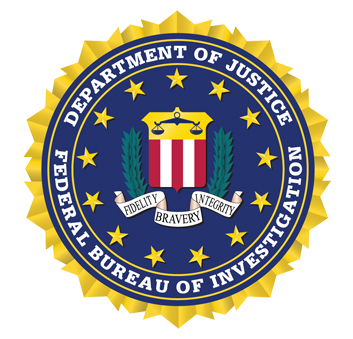

In [109]:
print(parsed_html)

####  Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe.

In [110]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [ ]:
# your code here

In [111]:
response = requests.get(url)

In [112]:
html = response.content                                     
parsed_html = bs4.BeautifulSoup(html, "html.parser") 

In [113]:
table = parsed_html.find("table", {'class': 'eqs table-scroll'})
table

<table class="eqs table-scroll">
<thead><tr><th class="thico"><th class="citiz" colspan="2"><div>Citizen<br/>response</div><div><div class="dm comm"></div><div class="dm pic"></div></div></th>
</th><th class="tbdat">Date &amp; Time<div>UTC</div></th><th class="tblat">Lat.<div>degrees</div></th><th class="tblon">Lon.<div>degrees</div></th><th class="tbdep">Depth<div>km</div></th><th class="tbmag">Mag.<span>[+]</span></th><th class="tbreg">Region</th></tr></thead>
<tbody></tbody>
</table>

In [114]:
headers = table.find_all("th")
headers

[<th class="thico"><th class="citiz" colspan="2"><div>Citizen<br/>response</div><div><div class="dm comm"></div><div class="dm pic"></div></div></th>
 </th>,
 <th class="citiz" colspan="2"><div>Citizen<br/>response</div><div><div class="dm comm"></div><div class="dm pic"></div></div></th>,
 <th class="tbdat">Date &amp; Time<div>UTC</div></th>,
 <th class="tblat">Lat.<div>degrees</div></th>,
 <th class="tblon">Lon.<div>degrees</div></th>,
 <th class="tbdep">Depth<div>km</div></th>,
 <th class="tbmag">Mag.<span>[+]</span></th>,
 <th class="tbreg">Region</th>]

In [115]:
titles = []
for i in headers: 
    title = i.text
    titles.append(title)

titles

['Citizenresponse\n',
 'Citizenresponse',
 'Date & TimeUTC',
 'Lat.degrees',
 'Lon.degrees',
 'Depthkm',
 'Mag.[+]',
 'Region']

In [116]:
df = pd.DataFrame(columns=titles)
print(df)

Empty DataFrame
Columns: [Citizenresponse
, Citizenresponse, Date & TimeUTC, Lat.degrees, Lon.degrees, Depthkm, Mag.[+], Region]
Index: []


In [117]:
body = parsed_html.find_all("tbody")
body

[<tbody></tbody>]

In [118]:
table = parsed_html.find('table').find('tbody')
table

In [119]:
filas = parsed_html.find('table', {"class": "eqs table-scroll"}).find('tbody').find_all('tr')
filas

[]

In [ ]:
# Tampoco me aparecen las filas

#### Count the number of tweets by a given Twitter account.
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account.

In [120]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

In [121]:
handle = input('Input your account name on Twitter: ')
temp = requests.get('https://twitter.com/'+handle)
bs = bs4.BeautifulSoup(temp.text,'html.parser')

Input your account name on Twitter: elenaaluquee


In [122]:
try:
    tweet_box = bs.find('li',{'class':'ProfileNav-item ProfileNav-item--tweets is-active'})
    tweets= tweet_box.find('a').find('span',{'class':'ProfileNav-value'})
    print("{} tweets {} number of tweets.".format(handle,tweets.get('data-count')))

except:
    print('Account name not found...')

Account name not found...


In [ ]:
# No existe ninguna cuenta ?

#### Number of followers of a given twitter account
Ask the user for the handle (@handle) of a twitter account. You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the followers for any provided account.

In [123]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

In [124]:
from bs4 import BeautifulSoup
import requests
handle = input('Input your account name on Twitter: ') 
temp = requests.get('https://twitter.com/'+handle)
bs = BeautifulSoup(temp.text,'html.parser')
try:
    follow_box = bs.find('li',{'class':'ProfileNav-item ProfileNav-item--followers'})
    followers = follow_box.find('a').find('span',{'class':'ProfileNav-value'})
    print("Number of followers: {} ".format(followers.get('data-count')))
except:
    print('Account name not found...')

Input your account name on Twitter: elenaaluquee
Account name not found...


#### List all language names and number of related articles in the order they appear in wikipedia.org.

In [125]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [ ]:
# your code here

In [126]:
response = requests.get(url) 

In [127]:
html = response.content                                  
parsed = bs4.BeautifulSoup(html, "html.parser") 

In [128]:
div = parsed.find_all("a", {"id": True, "href": True, "title": True, "class": "link-box"})          
len(div)

10

In [129]:
div

[<a class="link-box" data-slogan="The Free Encyclopedia" href="//en.wikipedia.org/" id="js-link-box-en" title="English — Wikipedia — The Free Encyclopedia">
 <strong>English</strong>
 <small><bdi dir="ltr">6 755 000+</bdi> <span>articles</span></small>
 </a>,
 <a class="link-box" data-slogan="Свободная энциклопедия" href="//ru.wikipedia.org/" id="js-link-box-ru" title="Russkiy — Википедия — Свободная энциклопедия">
 <strong>Русский</strong>
 <small><bdi dir="ltr">1 951 000+</bdi> <span>статей</span></small>
 </a>,
 <a class="link-box" data-slogan="フリー百科事典" href="//ja.wikipedia.org/" id="js-link-box-ja" title="Nihongo — ウィキペディア — フリー百科事典">
 <strong>日本語</strong>
 <small><bdi dir="ltr">1 396 000+</bdi> <span>記事</span></small>
 </a>,
 <a class="link-box" data-slogan="La enciclopedia libre" href="//es.wikipedia.org/" id="js-link-box-es" title="Español — Wikipedia — La enciclopedia libre">
 <strong>Español</strong>
 <small><bdi dir="ltr">1 913 000+</bdi> <span>artículos</span></small>
 </a>,

In [130]:
final = []   
for a in div:   
    a = str(a)
    soup_a = bs4.BeautifulSoup(a, "html.parser")
    idiomas = soup_a.find("strong")   
    numeros = soup_a.find("small")    
    
    idiomas = idiomas.get_text(strip=True)
    numeros = numeros.get_text(strip=True)
    mix = f'{idiomas} {numeros}' 
    final.append(mix)
    

In [131]:
len(final)

10

In [132]:
final

['English 6\xa0755\xa0000+articles',
 'Русский 1\xa0951\xa0000+статей',
 '日本語 1\xa0396\xa0000+記事',
 'Español 1\xa0913\xa0000+artículos',
 'Deutsch 2\xa0860\xa0000+Artikel',
 'Français 2\xa0575\xa0000+articles',
 'Italiano 1\xa0839\xa0000+voci',
 '中文 1\xa0391\xa0000+条目 / 條目',
 'العربية 1\xa0223\xa0000+مقالة',
 'فارسی 984\xa0000+مقاله']

#### A list with the different kind of datasets available in data.gov.uk.

In [133]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [ ]:
# your code here

In [134]:
response = requests.get(url)

In [135]:
html = response.content                                  
parsed = bs4.BeautifulSoup(html, "html.parser")

In [136]:
h3 = parsed.find_all("h3", {"class" : "govuk-heading-s dgu-topics__heading"})          
h3

[<h3 class="govuk-heading-s dgu-topics__heading"><a class="govuk-link" href="/search?filters%5Btopic%5D=Business+and+economy">Business and economy</a></h3>,
 <h3 class="govuk-heading-s dgu-topics__heading"><a class="govuk-link" href="/search?filters%5Btopic%5D=Crime+and+justice">Crime and justice</a></h3>,
 <h3 class="govuk-heading-s dgu-topics__heading"><a class="govuk-link" href="/search?filters%5Btopic%5D=Defence">Defence</a></h3>,
 <h3 class="govuk-heading-s dgu-topics__heading"><a class="govuk-link" href="/search?filters%5Btopic%5D=Education">Education</a></h3>,
 <h3 class="govuk-heading-s dgu-topics__heading"><a class="govuk-link" href="/search?filters%5Btopic%5D=Environment">Environment</a></h3>,
 <h3 class="govuk-heading-s dgu-topics__heading"><a class="govuk-link" href="/search?filters%5Btopic%5D=Government">Government</a></h3>,
 <h3 class="govuk-heading-s dgu-topics__heading"><a class="govuk-link" href="/search?filters%5Btopic%5D=Government+spending">Government spending</a></

In [137]:
kind_df = []
for element in h3:
    kind_df.append(element.string)

In [138]:
kind_df

['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

#### Display the top 10 languages by number of native speakers stored in a pandas dataframe.

In [143]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [ ]:
# your code here

In [152]:
response = requests.get(url)

In [149]:
html = response.content                                  
parsed = bs4.BeautifulSoup(html, "html.parser")

In [153]:
matched_table = pd.read_html(response.text, match='Languages with at least 50 million first-language speakers')

ImportError: lxml not found, please install it

In [142]:
len(matched_table)

NameError: name 'matched_table' is not defined

In [ ]:
tabla = matched_table[0]

In [ ]:
tabla.head(10)

## Bonus
#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code here

#### Display IMDB's top 250 data (movie name, initial release, director name and stars) as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Display the movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
# your code here

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = input('Enter the city: ')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code here

#### Find the book name, price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
# your code here